
# Tutorial 4 - Calculating Significance by Monte Carlo

In the homework you should have found the correlation coefficients for some data.  
The Pearson Correlation Coefficient is
\begin{align}
r_{xy} = \frac{1}{N}\frac{ \sum_i (x_i - \bar{x} ) (y_i - \bar{y}) }{ \sqrt{ S^2_x S^2_y} }
\end{align}
where
\begin{align}
\bar{x} = \frac{1}{N}\sum_i x_i ~~~~ S^2_x = \frac{1}{(N-1)} \sum_i ( x_i - \bar{x} )
\end{align}

A non-zero $r_{xy}$ should indicate that there is a correlation between $x$ and $y$.
$r_{xy}$ is an estimator of the populations true correlation coefficient
\begin{align}
\rho_{xy} = \frac{C_{XY}}{\sqrt{\sigma^2_x \sigma_y^2} }
\end{align}

But $r_{xy}$ is a function of random variables so we would not expect it to be exactly 0 
even if there were no correlations.  We could try to calculate the probability distribution of 
$r_{xy}$ analytically, but this might be difficult (more on this in lecture).

##  Monte Carlo

Instead lets find the significance of your measured $r_{xy}$ by Monte Carlo given the hypothesis that 
$x$ and $y$ are not correlated.


1. Create two vectors (X and Y) of random normally distributed numbers with variance 1 and mean zero.  Each vector should be 1000 elements long as was the data in the homework.  Calculate $r_{xy}$ for these.  X and Y 
are uncorrelated since they where generated independently.

2. Repeat step 1 a thousand times to get a distribution of $r_{xy}$.  You should to this in a loop.  There is no reason to save all the X's and Y's.

3. Plot a histogram of your  $r_{xy}$ values.  Does it look Gaussian?

4. What is the fraction of times $|r_{xy}|$ is larger than 0.025, 0.05, 0.08?  Would you expect to get this value if there were no correlation? Calculate the rxy for the homework set homework_01_2d-datafile.csv?  Would you expect to get this value if there were no correlation?

5. Do the exercise above over but this time use the measured $S^2_x$, $S^2_y$, $\bar{x}$ and $\bar{y}$ from homework\_01\_2d-datafile.csv  to generate the  X and Y variables.   Plot the new histogram of $r_{xy}$ over the old one.   Is there a difference or is the distribution of $r_{xy}$ independent of the averages and variances of the distributions?

6. Order your sample of $r_{xy}$'s from smallest to largest.  Take the $i$th value to be an estimate of the $r_{xy}$ where $(N-i)/N$ of the probability distribution is larger than it.  For example the 95\% upper bound would be at $i/N = 0.95$.  What is the 95\% upper bound on $r_{xy}$ if there is no correlation between $X$ and $Y$?  We will call this $r_{0.95}$.
In lecture we will find that the variance in this estimator is
\begin{align}
Var[r_p] = \frac{2 p (1-p) }{N f(r_p)^2 }
\end{align}
for large $N$ where $f(r)$ is the pdf of $r_{xy}$. 
Assuming that $r_{xy}$ is Gaussian distributed and its variance is the one you measure, what is the variance in your estimate of $r_{0.95}$?

7. Extra Credit: If you have time, do 1 through 3 for the Spearman and/or Kendall correlation coefficients.  There are Python functions for calculating them efficiently.  These are "rank statistics" that do not rely on any  assumption about the distribution of $X$ and $Y$ (in this case Gaussian) and are thus more widely applicable.  Do they indicate that the data in the home work is correlated?


In [54]:
#Tutorial # 04
## Calculating Significance by Monte Carlo
##
## More complete directions for this tutorial are in tut4.pdf
##

#1) Calculate two vectors (X and Y) of random normally distributed numbers 
#   with variance 1 and mean zero.  Each vector should be 1000 elements long 
#   as was the data in the homework.  Calculate $r_{xy}$ for these.
import numpy as np
import math
import matplotlib.pyplot as plt
x=np.random.normal(0,1,size=1000)
y=np.random.normal(0,1,size=1000)
def pearson(x,y):
    xs=x- np.mean(x)
    ys= y - np.mean(y)
    varx=sum(xs**2)/(len(x)-1)
    vary=sum(ys**2)/(len(x)-1)
    r=0
    for i in range(len(x)):
        r=r+xs[i]*ys[i]
    r=r/math.sqrt(varx*vary)/len(x)
    return r

print('rxy='+str(pearson(x,y)))

rxy=-0.02470824160174236


In [61]:
#2) Repeat step 1 a thousand times to get a distribution of $r_{xy}$ for a sample 
#   size equal to that of the homework.
rxy=np.empty(1000)
for i in range(1000):
    x=np.random.normal(0,1,size=1000)
    y=np.random.normal(0,1,size=1000)
    r=pearson(x,y)
    rxy[i]=r


c:\users\_pomfctopus_\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


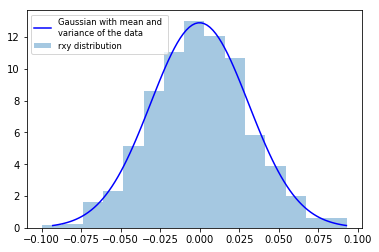

the distribution of rxy looks like a gaussian


In [62]:
#3) Plot a histogram of your  $r_{xy}$ values.
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.hist(rxy,bins=15,normed=True,alpha=0.4,label='rxy distribution')
meanr=np.mean(rxy)
rs=rxy-meanr
sigmar=math.sqrt(sum(rs**2)/(len(rxy)-1))
x1 = np.linspace(meanr-3*sigmar,meanr+3*sigmar, 100)
plt.plot(x1,norm.pdf(x1, loc=meanr,scale=sigmar),color='blue',label='Gaussian with mean and \nvariance of the data')
plt.legend(loc='upper left',fontsize='small')
plt.show()
print('the distribution of rxy looks like a gaussian')

In [67]:
#4) What is the fraction of times $|r_{xy}|$ is larger than your measured value 
#   for homework\_01\_2d-datafile.csv ?  Would you expect to find this if there 
#   were no correlation?
print('==== SAMPLE WITH MEAN=0 AND VARIANCE=1 ====')
p1=(float(np.sum(1*(abs(rxy))> 0.025)))/len(rxy)
print('prob |rxy|> 0.025 = '+str(p1)+str(' if x and y are not correlated i have ' +str(p1*100)+ '% probability to get |rxy|>0.025'))
p2=(float(np.sum(1*(abs(rxy))> 0.05)))/len(rxy)
print('prob |rxy|> 0.05 = '+str(p2)+str(' if x and y are not correlated i have ' +str(p2*100)+ '% probability to get |rxy|>0.05'))
p3=(float(np.sum(1*(abs(rxy))> 0.08)))/len(rxy)
print('prob |rxy|> 0.08 = '+str(p3)+str(' if x and y are not correlated i have ' +str(p3*100)+ '% probability to get |rxy|>0.08'))
import pandas as pd
file='homework_01_2d-datafile.csv'
data=pd.read_csv(file,header=0,index_col=0)
data_array=data.values
xhome=data_array[:,0]
yhome=data_array[:,1]
rhomew=pearson(xhome,yhome)
print(' ')
print('rxy for homework data= '+str(rhomew) +str(' if data were not correleted i would not expect \nto get this high value for rxy so data is correlated'))

==== SAMPLE WITH MEAN=0 AND VARIANCE=1 ====
prob |rxy|> 0.025 = 0.405 if x and y are not correlated i have 40.5% probability to get |rxy|>0.025
prob |rxy|> 0.05 = 0.11 if x and y are not correlated i have 11.0% probability to get |rxy|>0.05
prob |rxy|> 0.08 = 0.012 if x and y are not correlated i have 1.2% probability to get |rxy|>0.08
 
rxy for homework data= 0.9484965806973131 if data were not correleted i would not expect 
to get this high value for rxy so data is correlated


==== SAMPLE WITH MEAN AND VARAINCE FROM DATA ====
prob |rxy|> 0.025 = 0.443 if x and y are not correlated i have 44.3% probability to get |rxy|>0.025
prob |rxy|> 0.05 = 0.129 if x and y are not correlated i have 12.9% probability to get |rxy|>0.05
prob |rxy|> 0.08 = 0.006 if x and y are not correlated i have 0.6% probability to get |rxy|>0.08
probabilities are simliar to the ones obtained with the previous sample


c:\users\_pomfctopus_\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


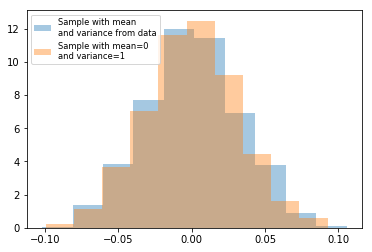

there is not much difference between the two distributions


In [71]:
#5) Do the exersize over but this time use the measured $S^2_x$, $S^2_y$, $\bar{x}$ 
#   and $\bar{y}$ from homework\_01\_2d-datafile.csv  to generate the  X and Y 
#   variables.  Does this make any difference?
xshome=xhome- np.mean(xhome)
yshome= yhome - np.mean(yhome)
varxhome=sum(xshome**2)/(len(x)-1)
varyhome=sum(yshome**2)/(len(x)-1)
rxynew=np.empty(1000)
for i in range(1000):
    x=np.random.normal(np.mean(xhome),varxhome,size=1000)
    y=np.random.normal(np.mean(yhome),varyhome,size=1000)
    r=pearson(x,y)
    rxynew[i]=r
print('==== SAMPLE WITH MEAN AND VARAINCE FROM DATA ====')
p1=(float(np.sum(1*(abs(rxynew))> 0.025)))/len(rxynew)
print('prob |rxy|> 0.025 = '+str(p1)+str(' if x and y are not correlated i have ' +str(p1*100)+ '% probability to get |rxy|>0.025'))
p2=(float(np.sum(1*(abs(rxynew))> 0.05)))/len(rxynew)
print('prob |rxy|> 0.05 = '+str(p2)+str(' if x and y are not correlated i have ' +str(p2*100)+ '% probability to get |rxy|>0.05'))
p3=(float(np.sum(1*(abs(rxynew))> 0.08)))/len(rxynew)
print('prob |rxy|> 0.08 = '+str(p3)+str(' if x and y are not correlated i have ' +str(p3*100)+ '% probability to get |rxy|>0.08'))
print('probabilities are simliar to the ones obtained with the previous sample')
plt.hist(rxynew,normed=True,alpha=0.4,label='Sample with mean \nand variance from data')
plt.hist(rxy,normed=True,alpha=0.4,label='Sample with mean=0 \nand variance=1')
plt.legend(loc='upper left',fontsize='small')
plt.show()
print('there is not much difference between the two distributions')

In [30]:
#6) Order your sample of $r_{xy}$'s from smallest to largest.  Take the $i$th 
#   value to be an estimate of the $r_{xy}$ where $(N-i)/N$ of the probability 
#   distribution is larger than it.  For example the 95\% upper bound would be 
#   at i/N = 0.95.  What is the 95% upper bound on $r_{xy}$ if there is not 
#   correlation between $X$ and $Y$?  We will call this $r_{0.95}$.
#   In lecture we will find that the variance in this estimator is
#
#   Var[r_p] = \frac{ 2 p (1-p) }{N f(r_p)^2 }
#
#   for large $N$ where $f(r)$ is the pdf of $r_{xy}$. 
#   Assuming that $r_{xy}$ is Gaussian distributed and its variance is the one 
#   you measure, what is the variance in your estimate of $r_{0.95}$?
rxysort=np.sort(rxy)
rup=rxysort[int(0.95*len(rxy))]
print('if x and y are not correlated i have 5% probability to obtain |r|>'+str(rup))
frp=norm.pdf(rup, loc=meanr,scale=sigmar)
var=2*0.95*(1-0.95)/(len(rxy)*frp**2)
print('the variance in this estimator is ' +str(var))


if x and y are not correlated i have 5% probability to obtain |r|>0.04997142850158952
the variance in this estimator is 7.261261314087944e-06


==== ONE SAMPLE ====
Spearman correlation coefficient= -0.002185742185742186
Kendall correlation coefficient= -0.0009809809809809811
==== 1000 SAMPLES====


c:\users\_pomfctopus_\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


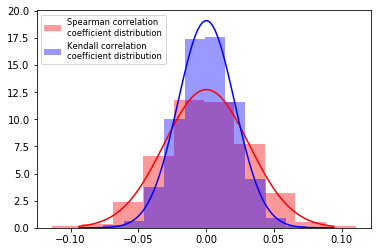

Spearman and Kendall correlation coefficients seem to be gaussian distributed too
 
Spearman correlation coefficient for homework data= 0.9404303804303806
Kendall correlation coefficient for homework data= 0.7919839839839841
homework data is correlated according to these coefficients too


In [72]:
#7) Extra Credit: If you have time, do 1 through 3 for the Spearman and/or Kendall correlation coefficients.  
#   There are Python functions for calculating them efficiently.  
#   These are "rank statistics" that do not rely on any  assumption about the distribution of $X$ and $Y$ 
#   (in this case Gaussian) and are thus more widely applicable.  
#   Do they indicate that the data in the home work is correlated?
from scipy.stats import spearmanr
from scipy.stats import kendalltau
print('==== ONE SAMPLE ====')
x=np.random.normal(0,1,size=1000)
y=np.random.normal(0,1,size=1000)
s=spearmanr(x,y)[0]
k=kendalltau(x,y)[0]
print('Spearman correlation coefficient= '+str(s))
print('Kendall correlation coefficient= '+str(k))
print('==== 1000 SAMPLES====')
sa=np.empty(1000)
ka=np.empty(1000)
for i in range(1000):
    x=np.random.normal(0,1,size=1000)
    y=np.random.normal(0,1,size=1000)
    sa[i]=spearmanr(x,y)[0]
    ka[i]=k=kendalltau(x,y)[0]
plt.hist(sa,normed=True,alpha=0.4,color='red',label='Spearman correlation \ncoefficient distribution')
plt.hist(ka,normed=True,alpha=0.4,color='blue',label='Kendall correlation \ncoefficient distribution')
samean=np.mean(sa)
sastd=np.std(sa,ddof=1)
kamean=np.mean(ka)
kastd=np.std(ka,ddof=1)
x1 = np.linspace(samean-3*sastd,samean+3*sastd, 100)
plt.plot(x1,norm.pdf(x1, loc=samean,scale=sastd),color='red')
plt.plot(x1,norm.pdf(x1, loc=kamean,scale=kastd),color='blue')
plt.legend(loc='upper left',fontsize='small')
plt.show()
print('Spearman and Kendall correlation coefficients seem to be gaussian distributed too')
print(' ')
print('Spearman correlation coefficient for homework data= '+str(spearmanr(xhome,yhome)[0]))
print('Kendall correlation coefficient for homework data= '+str(kendalltau(xhome,yhome)[0]))
print('homework data is correlated according to these coefficients too')